<a href="https://colab.research.google.com/github/piyushsoni27/CNN_web/blob/master/CNN_train_test/CNN_train_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
"""
import os

os.chdir("drive/My Drive/Google colab projects/CNN_web")
"""

'\nimport os\n\nos.chdir("drive/My Drive/Google colab projects/CNN_web")\n'

In [0]:
patches_dir = "cifar-10-batches-py/"

#imports

In [0]:
import numpy as np
import pickle
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

##Download and load pre-trained *Inception V3* model

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

## Minimum input image shape is (75, 75, 3) for inceptionV3 model.

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(75, 75, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

##Functions for loading data 

In [0]:
def load_cifar10_batch(batch_id):

    with open(os.path.join('cifar-10-batches-py','data_batch_' 
              + str(batch_id)), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
    
    return features, labels
  
x_train = np.zeros(shape = (50000, 32, 32, 3), dtype = np.uint8)
y_train = []
  
for batch_id in range(1,6):
    x, y = load_cifar10_batch(batch_id)
    x_train[10000*(batch_id-1) : 10000*batch_id] = x
    y_train.extend(y)


50000
(32, 32, 3)
5
254


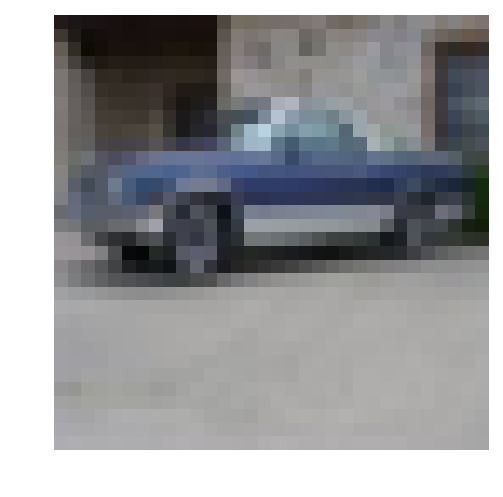